In [1]:
import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers
%matplotlib inline

#https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt   

Using TensorFlow backend.


In [24]:
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet', include_top=False)
# include_top=False : CNN 부분만 가져오기. 특징추출만.


#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet', include_top=False)


#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet', include_top=False)
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet', include_top=False)  

In [25]:
vgg_model.summary()    # 138,357,544
# inception_model.summary() # 23,851,784
# resnet_model.summary()  # 25,636,712
# mobilenet_model.summary() # 4,253,864

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

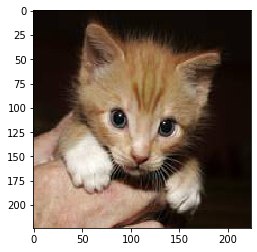

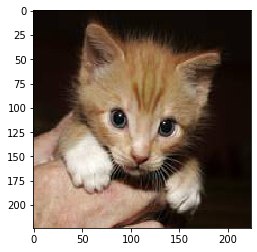

image batch size (1, 224, 224, 3)


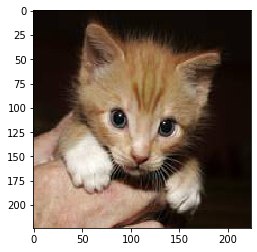

In [4]:
filename = 'cat.jpg'
original = load_img(filename, target_size=(224, 224)) # summary의 크기 참조
plt.imshow(original)
plt.show()

numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()

image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [26]:
processed_image = vgg16.preprocess_input(image_batch.copy())
# print(processed_image.shape)
# print(processed_image.dtype)
# print(processed_image[0])

In [27]:
predictions = vgg_model.predict(processed_image)
# print(predictions.shape)
# print(predictions) #여기서 최대값

In [10]:
label_vgg = decode_predictions(predictions, top=10)
print(label_vgg)

[[('n02971356', 'carton', 0.07939267), ('n02123045', 'tabby', 0.06285963), ('n02124075', 'Egyptian_cat', 0.048587643), ('n02112018', 'Pomeranian', 0.034351744), ('n04409515', 'tennis_ball', 0.03324166), ('n02123159', 'tiger_cat', 0.030086089), ('n03255030', 'dumbbell', 0.02684114), ('n02105855', 'Shetland_sheepdog', 0.020001741), ('n03657121', 'lens_cap', 0.018975087), ('n07930864', 'cup', 0.01896756)]]


In [11]:
processed_image = resnet50.preprocess_input(image_batch.copy())
predictions = resnet_model.predict(processed_image)
label_resnet = decode_predictions(predictions, top=3)
label_resnet

[[('n02124075', 'Egyptian_cat', 0.12500808),
  ('n02443114', 'polecat', 0.078230105),
  ('n02123045', 'tabby', 0.07687626)]]

In [12]:
processed_image = mobilenet.preprocess_input(image_batch.copy())
predictions = mobilenet_model.predict(processed_image)
label_mobilenet = decode_predictions(predictions)
label_mobilenet

[[('n02124075', 'Egyptian_cat', 0.51461023),
  ('n02123045', 'tabby', 0.27314353),
  ('n02123159', 'tiger_cat', 0.01804026),
  ('n02119789', 'kit_fox', 0.017363517),
  ('n02123394', 'Persian_cat', 0.015591638)]]

In [13]:
filename = 'cat.jpg'
original = load_img(filename, target_size=(299, 299))
numpy_image = img_to_array(original)
image_batch = np.expand_dims(numpy_image, axis=0)

processed_image = inception_v3.preprocess_input(image_batch.copy())
predictions = inception_model.predict(processed_image)
label_inception = decode_predictions(predictions)
label_inception

[[('n02124075', 'Egyptian_cat', 0.7991428),
  ('n02123159', 'tiger_cat', 0.064078435),
  ('n02123045', 'tabby', 0.045233995),
  ('n02127052', 'lynx', 0.018139727),
  ('n04589890', 'window_screen', 0.0034129042)]]

In [29]:
import cv2
img = cv2.imread("cat.jpg")
img = cv2.resize(img, (1000,1000))
cv2.putText(img, "VGG16: {}, {:.2f}".format(label_vgg[0][0][1], label_vgg[0][0][2]) , (350, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(img, "MobileNet: {}, {:.2f}".format(label_mobilenet[0][0][1], label_mobilenet[0][0][2]) , (350, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(img, "Inception: {}, {:.2f}".format(label_inception[0][0][1], label_inception[0][0][2]) , (350, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(img, "ResNet50: {}, {:.2f}".format(label_resnet[0][0][1], label_resnet[0][0][2]) , (350, 145), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.imwrite("./output/out.jpg", img)

True